In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'diabetes.csv'
df = pd.read_csv(file_path)


In [ ]:
# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Get a concise summary of the dataframe, including data types and non-null counts
print("\nDataset Information:")
df.info()

# Generate descriptive statistics to identify potential issues (like min values of 0)
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non

In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with the 'median' strategy
imputer = SimpleImputer(strategy='median')

# Create a copy to store the imputed data
df_imputed = df.copy()

# Fit the imputer on the feature columns and transform them
# We exclude the 'Outcome' column as it's the target variable
df_imputed.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

# Verify that there are no more missing values
print("Number of missing values after imputation:")
print(df_imputed.isnull().sum())

Number of missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


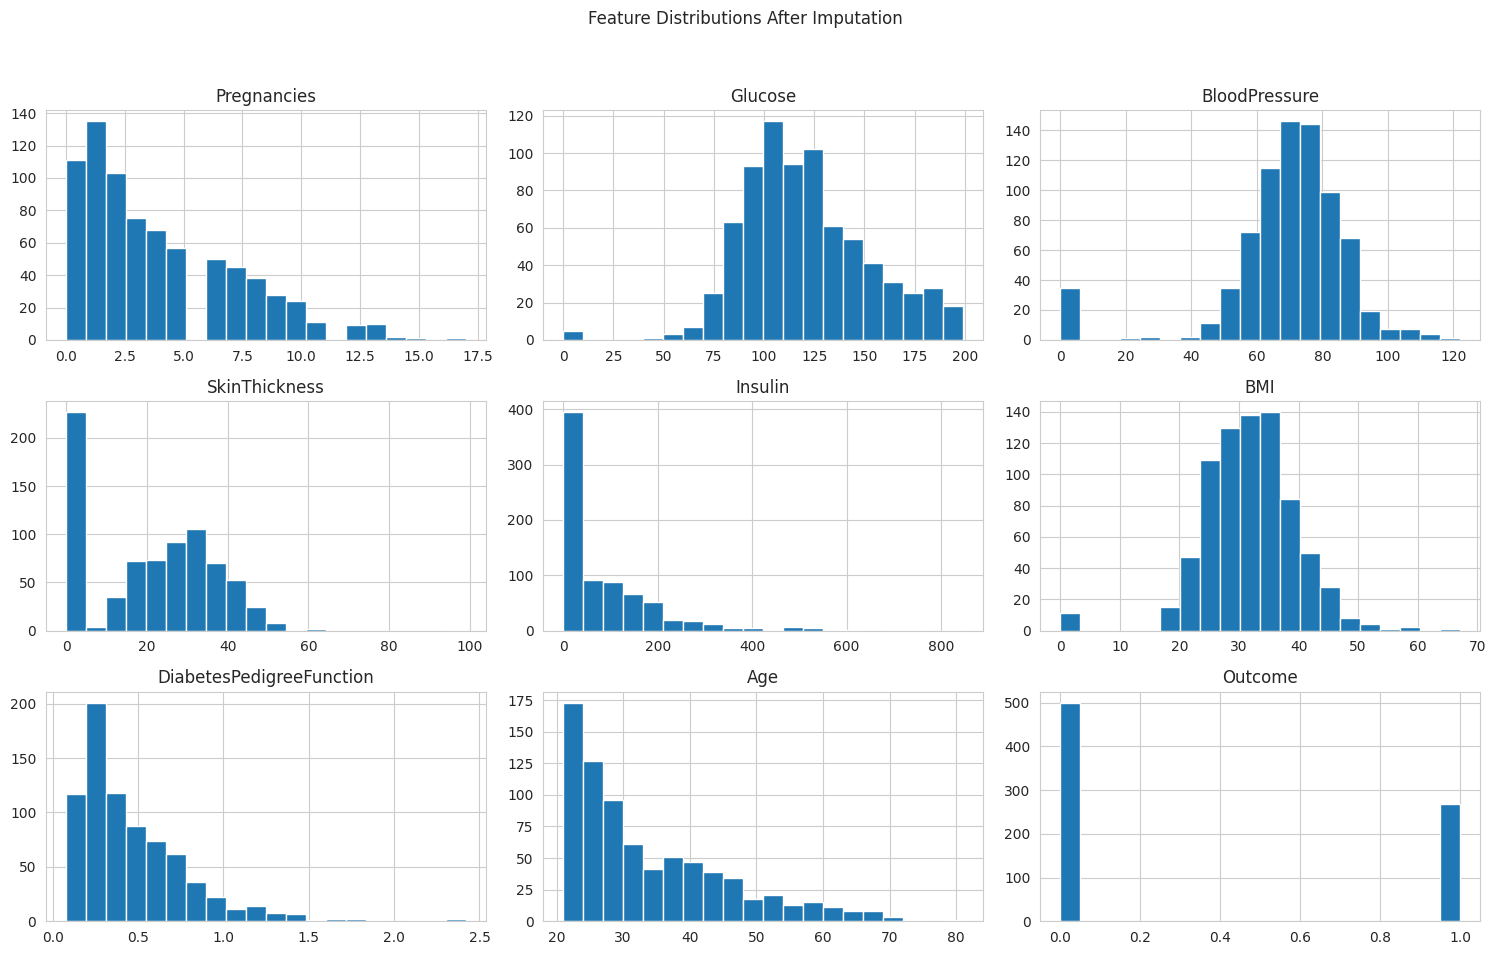

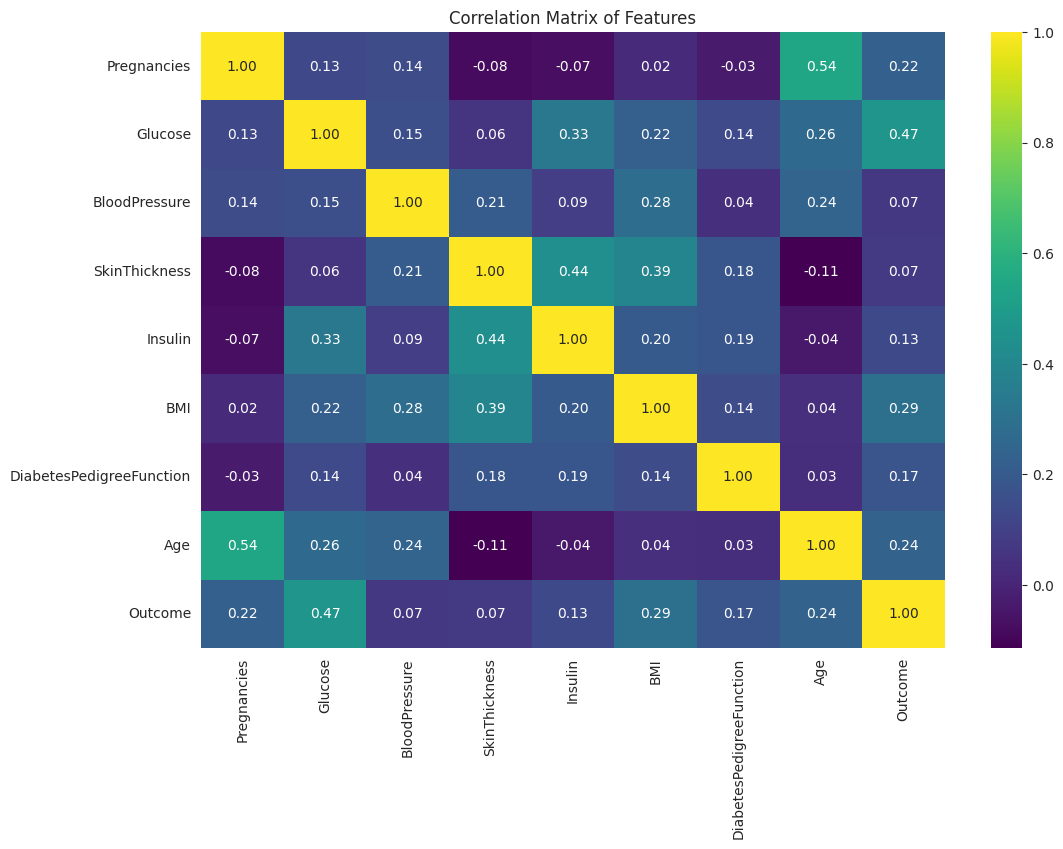

In [ ]:
# Set plot style
sns.set_style('whitegrid')

# Plot histograms for each feature to see their distributions
df_imputed.hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions After Imputation')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot a correlation heatmap to see relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(df_imputed.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# Train and Evaluate Decision Tree Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and the target variable (y)
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Split the data into training (80%) and testing (20%) sets
# Use stratify=y to maintain the same proportion of outcomes in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data to prevent data leakage
# Then transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to pandas DataFrames for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Data successfully split and scaled.")
print("Shape of training features:", X_train_scaled.shape)
print("Shape of testing features:", X_test_scaled.shape)

Data successfully split and scaled.
Shape of training features: (614, 8)
Shape of testing features: (154, 8)


# Visualize Decision Tree Confusion Matrix

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Decision Tree Classifier with a random_state for reproducibility
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the scaled training data
dt_classifier.fit(X_train_scaled, y_train)

# Make predictions on the unseen test data
y_pred_dt = dt_classifier.predict(X_test_scaled)

# --- Evaluation ---
# Calculate and print the accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Print the confusion matrix
print("\nConfusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))

# Print the classification report with precision, recall, and F1-score
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt, target_names=['non-diabetic', 'diabetic']))

Decision Tree Accuracy: 0.7208

Confusion Matrix (Decision Tree):
[[85 15]
 [28 26]]

Classification Report (Decision Tree):
              precision    recall  f1-score   support

non-diabetic       0.75      0.85      0.80       100
    diabetic       0.63      0.48      0.55        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.71      0.72      0.71       154



# Analyze and Plot Decision Tree Feature Importance

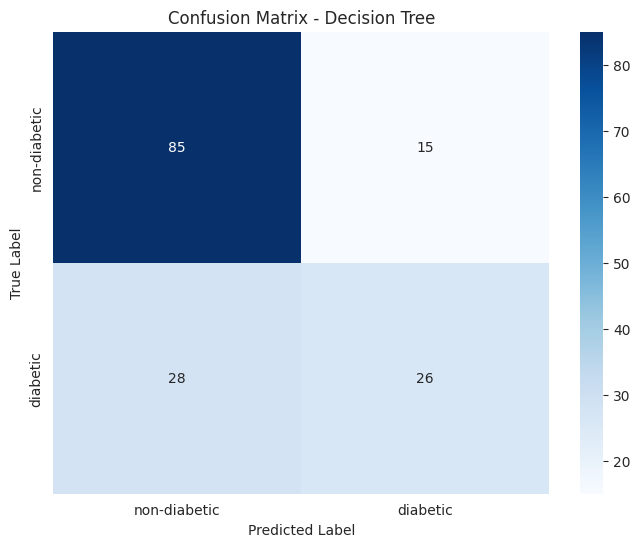

In [ ]:
# Generate the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['non-diabetic', 'diabetic'],
            yticklabels=['non-diabetic', 'diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Train and Evaluate Random Forest Classifier

/tmp/ipython-input-1830965544.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_dt, palette='viridis')


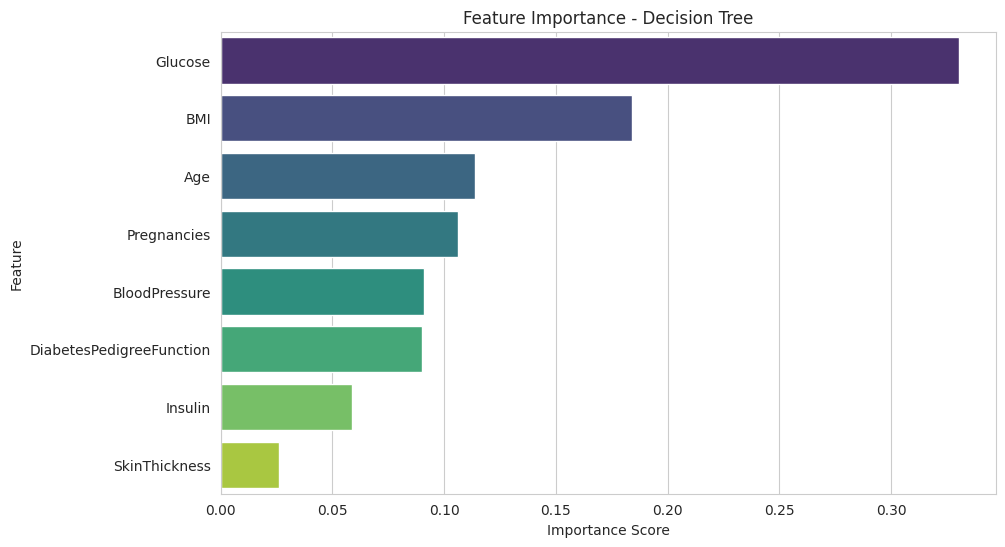

In [ ]:
# Get feature importances from the trained Decision Tree model
importances_dt = dt_classifier.feature_importances_

# Create a DataFrame for easier visualization
feature_importance_dt = pd.DataFrame({'feature': X.columns, 'importance': importances_dt})
feature_importance_dt = feature_importance_dt.sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_dt, palette='viridis')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Visualize Random Forest Confusion Matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest Classifier with 100 trees and a random_state
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the scaled training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test_scaled)

# --- Evaluation ---
# Calculate and print the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Print the confusion matrix
print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

# Print the classification report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=['non-diabetic', 'diabetic']))

Random Forest Accuracy: 0.7597

Confusion Matrix (Random Forest):
[[85 15]
 [22 32]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

non-diabetic       0.79      0.85      0.82       100
    diabetic       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



# Analyze and Plot Random Forest Feature Importance

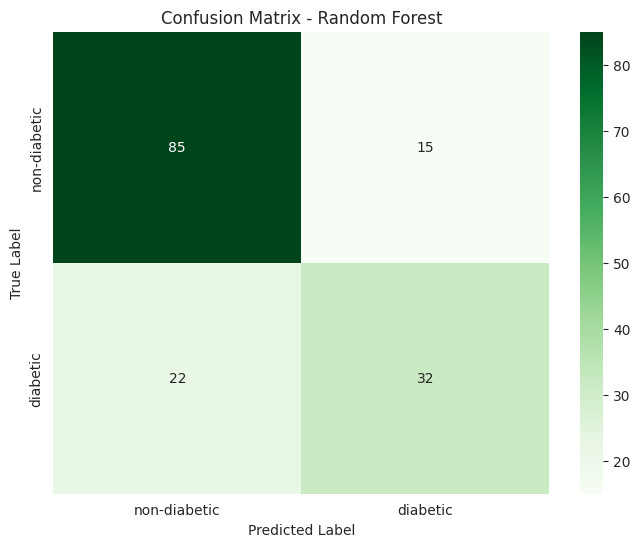

In [ ]:
# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['non-diabetic', 'diabetic'],
            yticklabels=['non-diabetic', 'diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

/tmp/ipython-input-2912993835.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_rf, palette='plasma')


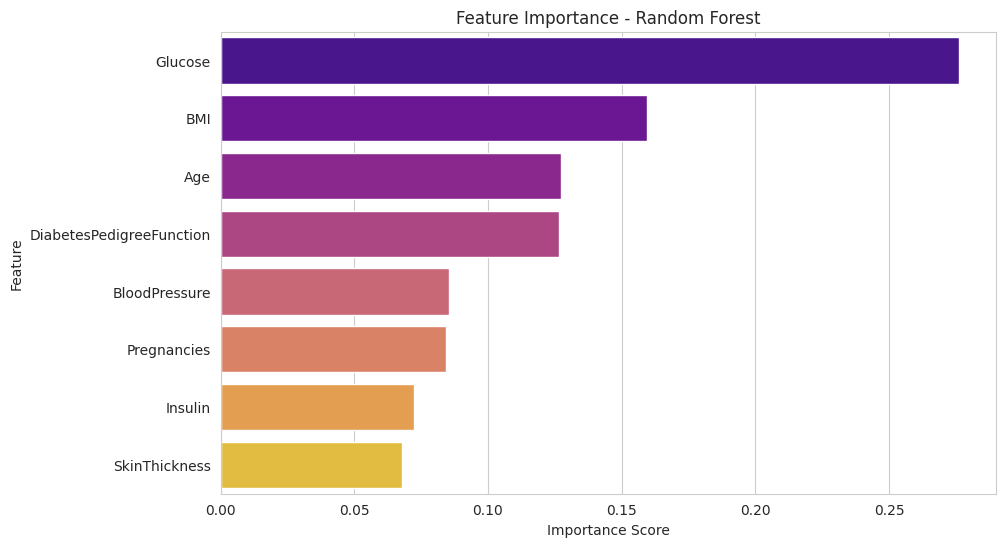

In [ ]:
# Get feature importances from the trained Random Forest model
importances_rf = rf_classifier.feature_importances_

# Create a DataFrame for visualization
feature_importance_rf = pd.DataFrame({'feature': X.columns, 'importance': importances_rf})
feature_importance_rf = feature_importance_rf.sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_rf, palette='plasma')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Print a final comparison of the accuracy scores
print("--- Model Performance Comparison ---")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Concluding statement based on the results
if accuracy_rf > accuracy_dt:
    print("\nThe Random Forest classifier performed better than the single Decision Tree.")
else:
    print("\nThe Decision Tree classifier performed better than or equal to the Random Forest.")

--- Model Performance Comparison ---
Decision Tree Accuracy: 0.7208
Random Forest Accuracy: 0.7597

The Random Forest classifier performed better than the single Decision Tree.
